# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import joblib
import os

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
raw_path = "../archive/train.csv"
df = pd.read_csv(raw_path)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
       Item_Weight  Item_Visibility     

In [6]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [8]:
palette = sns.color_palette('viridis')
def kdeplot_and_boxplot(df, columns):
    fig, ax = plt.subplots(4, 2, figsize = (30, 40))
    ax = ax.flatten()

    for i, col in enumerate(columns):
        sns.histplot(x = col, data=df, ax=ax[2 * i], color=palette[i], kde=True, lw=1.5, edgecolor='black')
        ax[2*i].set_title(col, fontweight = 'bold', fontfamily='serif', fontsize=20)
        sns.boxplot(x = col, data=df, ax=ax[2 * i+1], color=palette[i])
        ax[2 * i+1].set_title(col, fontweight = 'bold', fontfamily='serif', fontsize=20)

    plt.show()

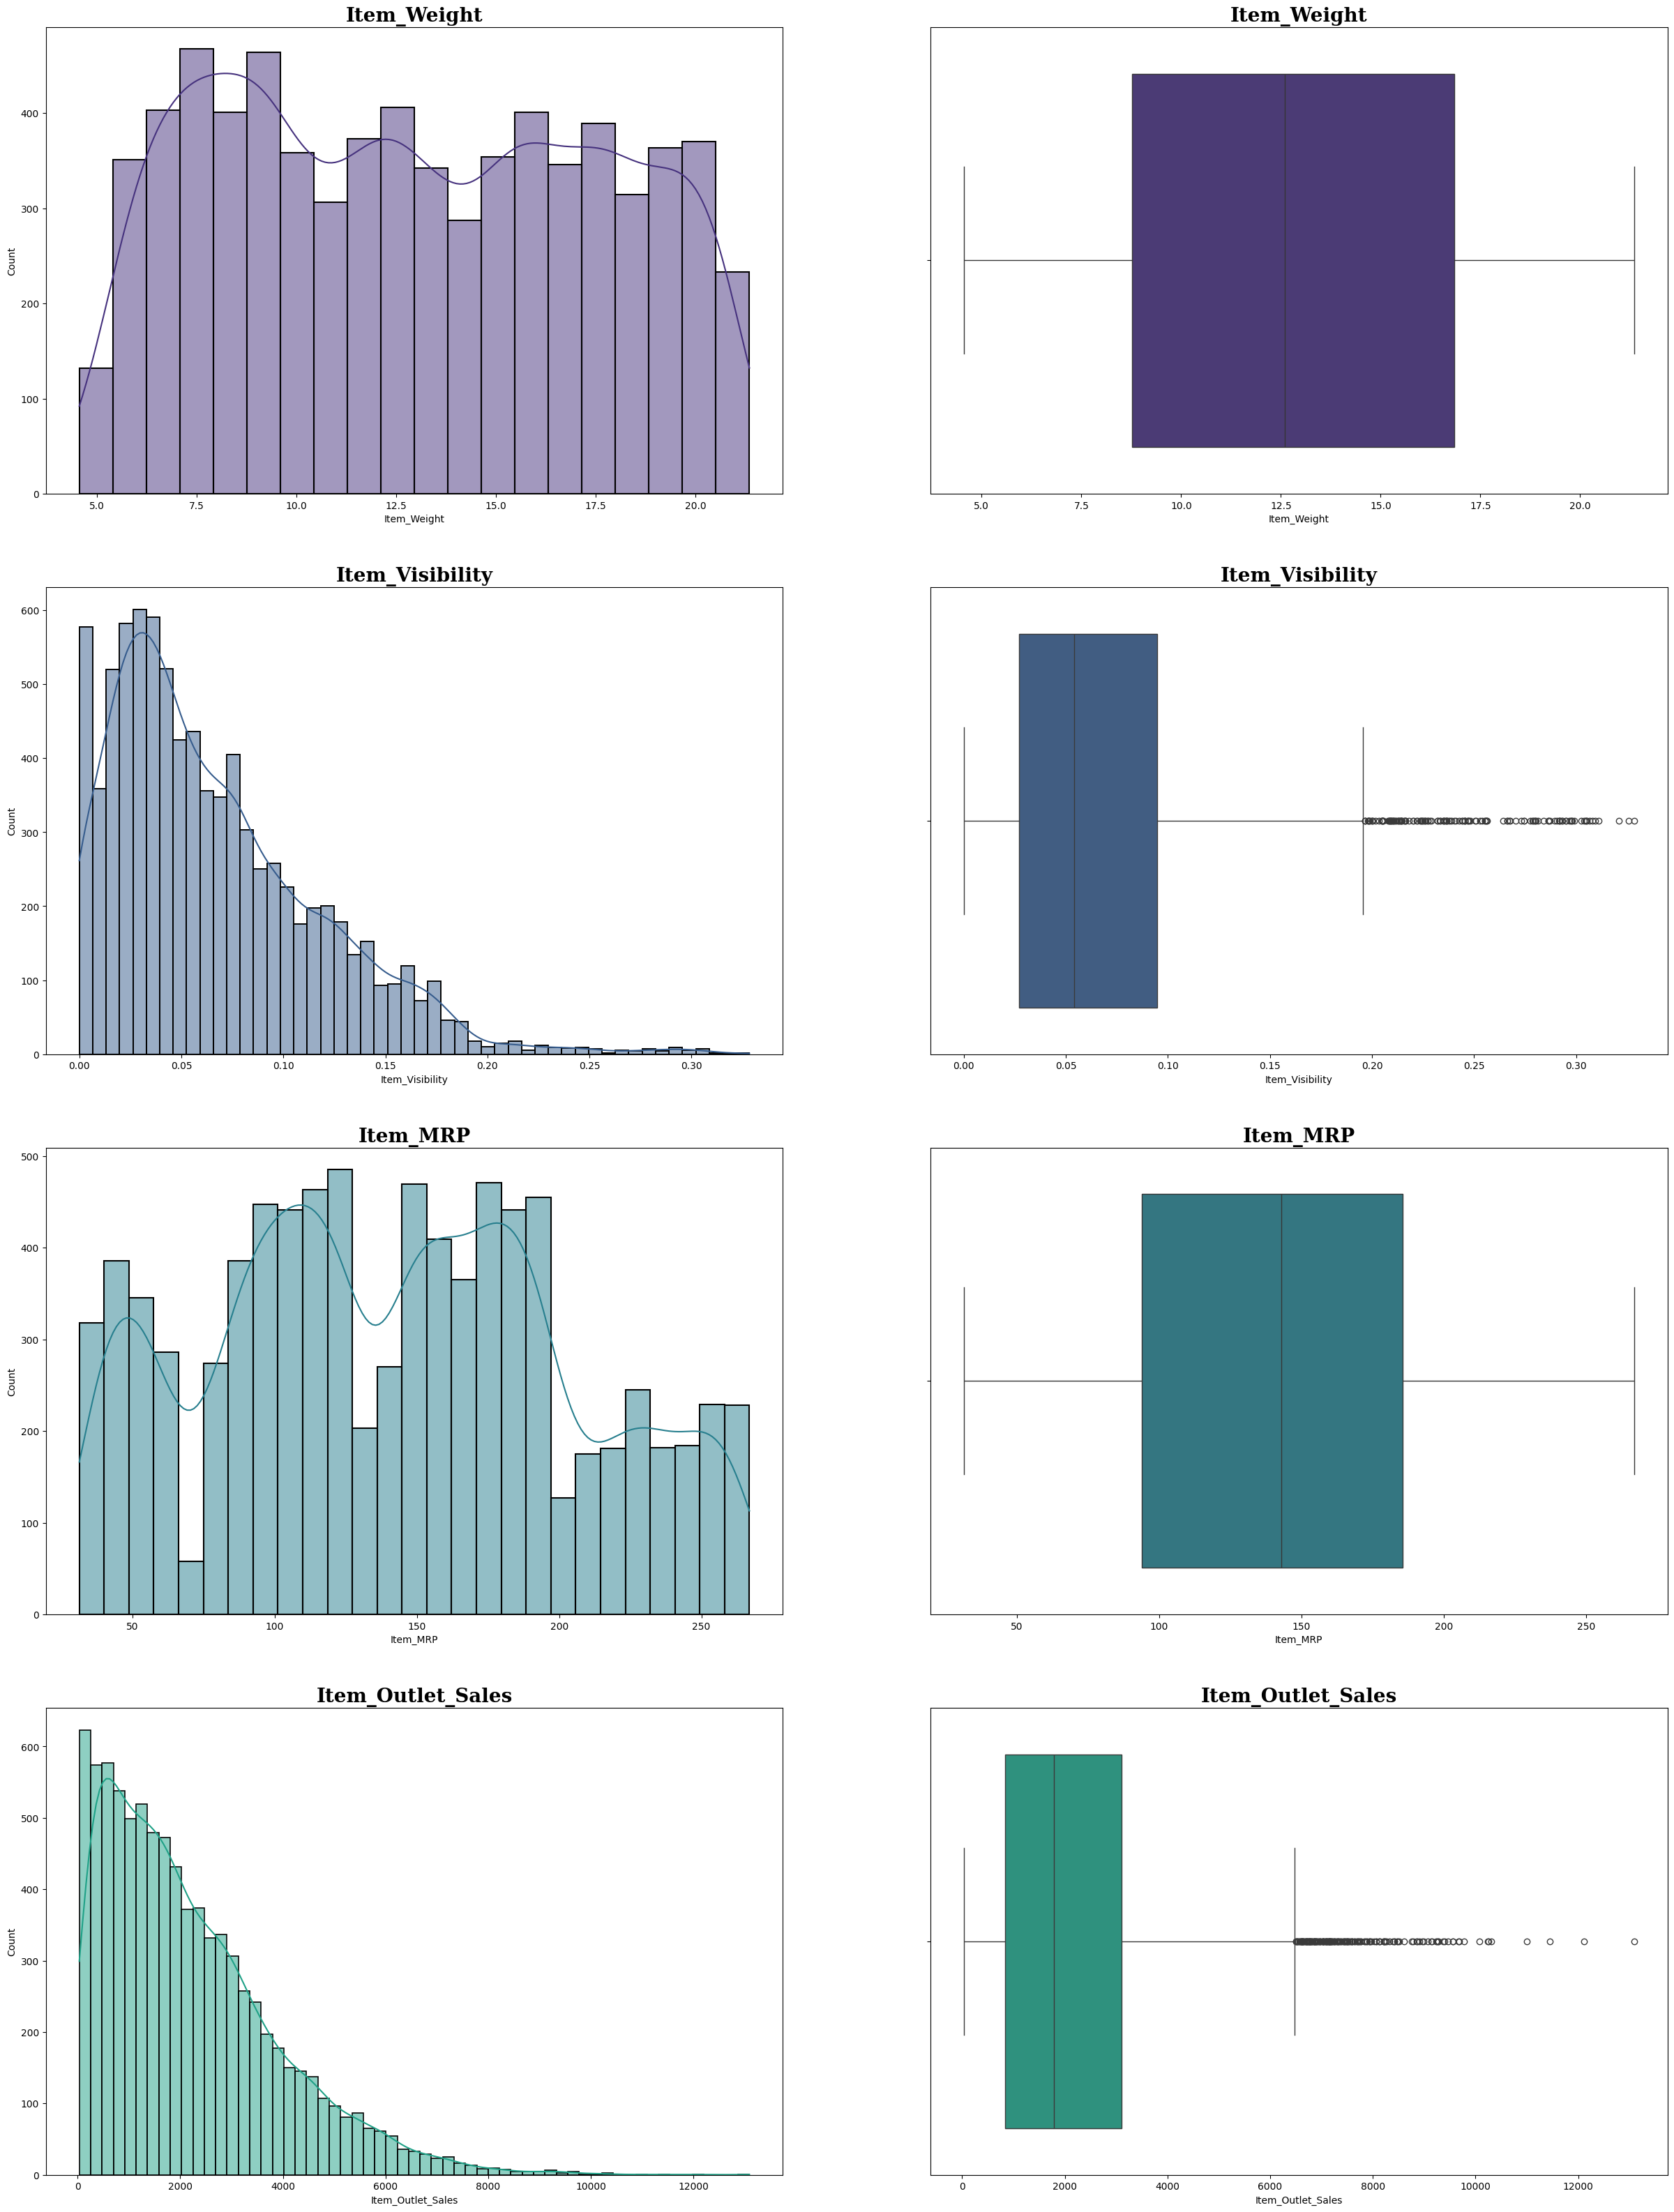

In [9]:
num_columns = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
kdeplot_and_boxplot(df,num_columns)

In [10]:
def pie_plot(columns,df):
    num_columns = 2
    num_rows = 3

    fig,axes = plt.subplots(num_rows,num_columns,figsize=(14,12))
    axes = axes.flatten()
    for i,column in enumerate(columns):
        counts = df[column].value_counts()
        palette = sns.color_palette('viridis',df[column].nunique())

        axes[i].pie(counts.values,labels=counts.index,autopct='%.2f%%',colors=palette)
        axes[i].set_title(f'{column} Distribution',fontsize=20,fontweight='bold')

    for j in range(len(columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [11]:
df_cp =  df.copy()
item_counts = df_cp['Item_Type'].value_counts()

def categorize_item_type(item_type):
    if item_counts[item_type] < 445:
        return 'Others'
    return item_type

df_cp['Item_Type'] = df_cp['Item_Type'].apply(categorize_item_type)
df_cp['Item_Type'].value_counts()

Item_Type
Others                   1381
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Name: count, dtype: int64

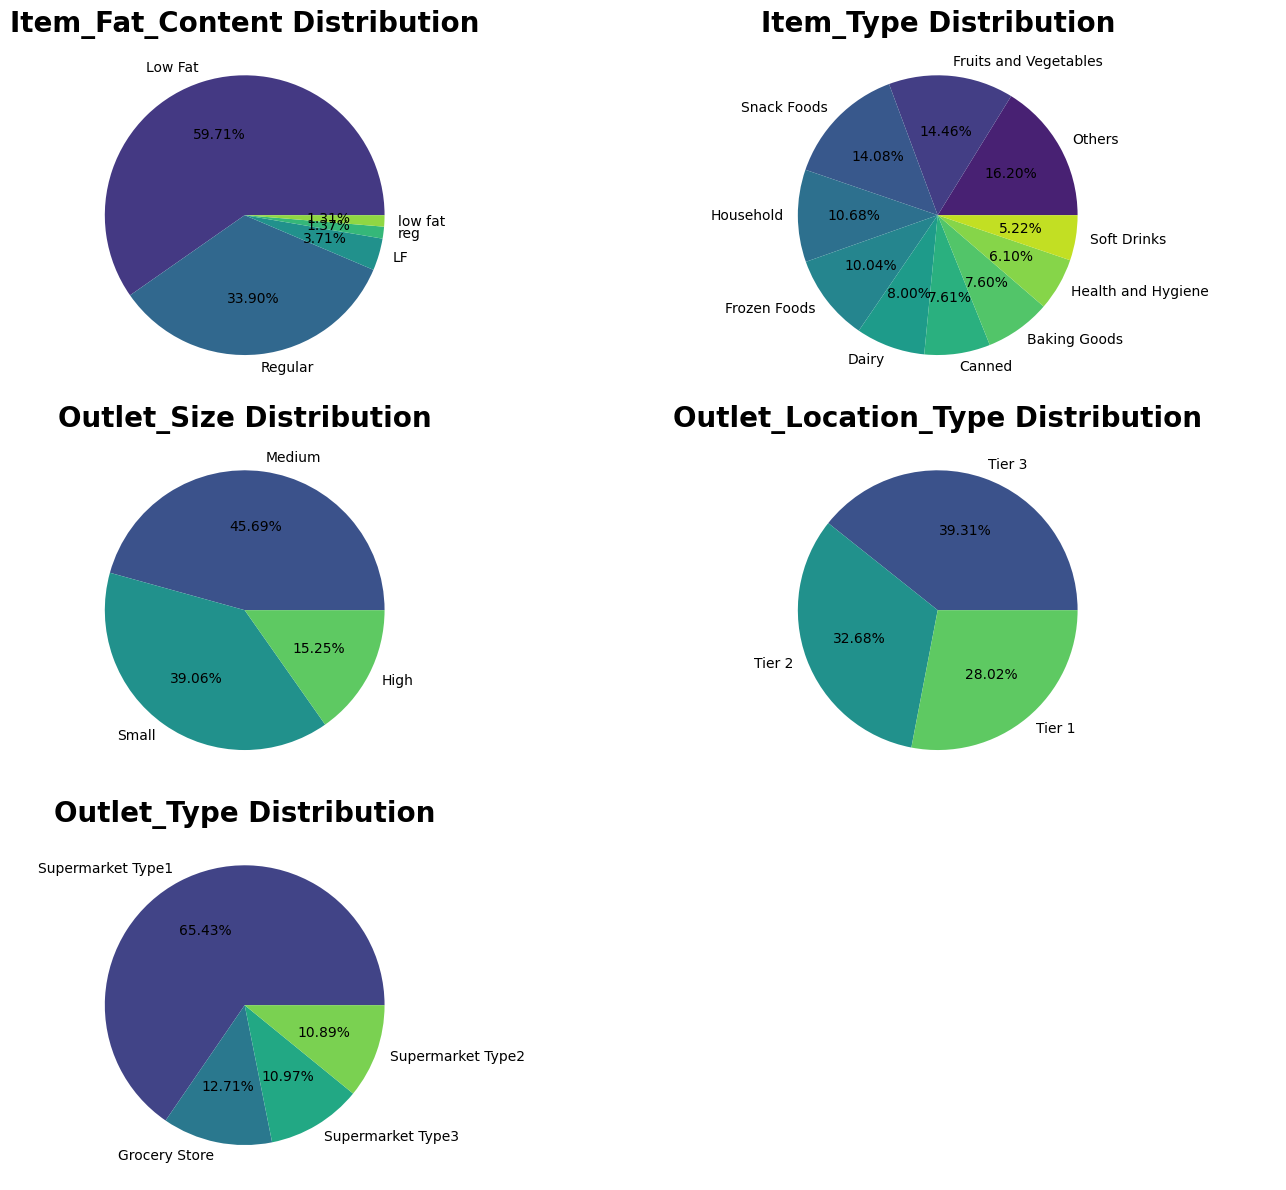

In [12]:
cat_columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
pie_plot(cat_columns,df_cp)

## Bivariate Analysis

Item MRP (Maximum Retail Price) vs. Sales

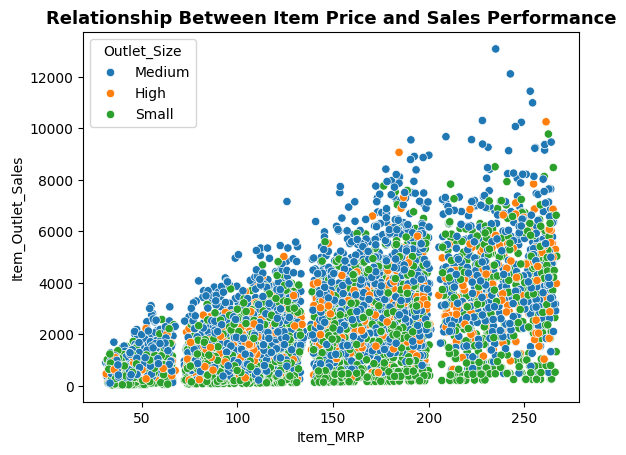

In [13]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Outlet_Size',data=df)

plt.title('Relationship Between Item Price and Sales Performance',fontsize=13,fontweight='bold')
plt.show()

Outlet Type vs. Sales

In [14]:
type_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()
type_sales

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type3,3694.038558
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Grocery Store,339.828500


C:\Users\Sinta\AppData\Local\Temp\ipykernel_19964\4276609026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=type_sales,palette='viridis')


Text(0.5, 1.0, 'Outlet Type vs. Sales')

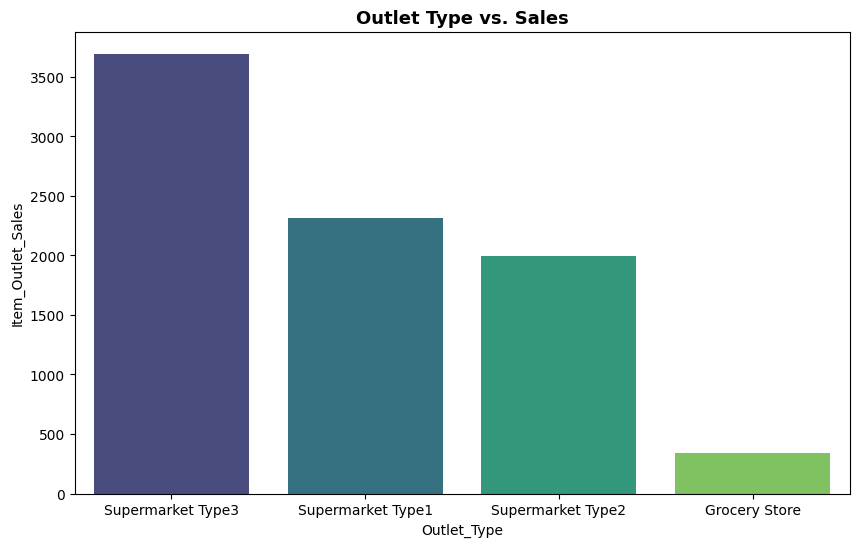

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=type_sales,palette='viridis')
plt.title('Outlet Type vs. Sales',fontsize=13,fontweight='bold')

Outlet Location vs. Sales

In [16]:
location_sales = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().reset_index().sort_values(by='Outlet_Location_Type')
location_sales

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,1876.909159
1,Tier 2,2323.990559
2,Tier 3,2279.627651


C:\Users\Sinta\AppData\Local\Temp\ipykernel_19964\34474266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=location_sales,palette='viridis')


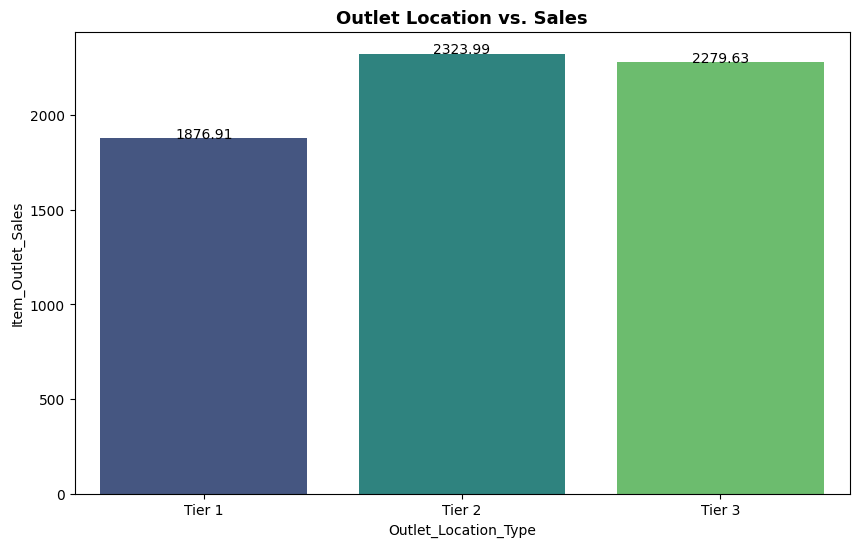

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=location_sales,palette='viridis')
plt.title('Outlet Location vs. Sales',fontsize=13,fontweight='bold')

for index, value in enumerate(location_sales['Item_Outlet_Sales']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

Outlet Size vs. Sales

In [18]:
size_sales = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index()
size_sales

,Outlet_Size,Item_Outlet_Sales
0,High,2298.995256
1,Medium,2681.603542
2,Small,1912.149161


C:\Users\Sinta\AppData\Local\Temp\ipykernel_19964\2255111896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=size_sales,ax=ax[0],palette='viridis')


Text(0.5, 1.0, 'Outlet_Size')

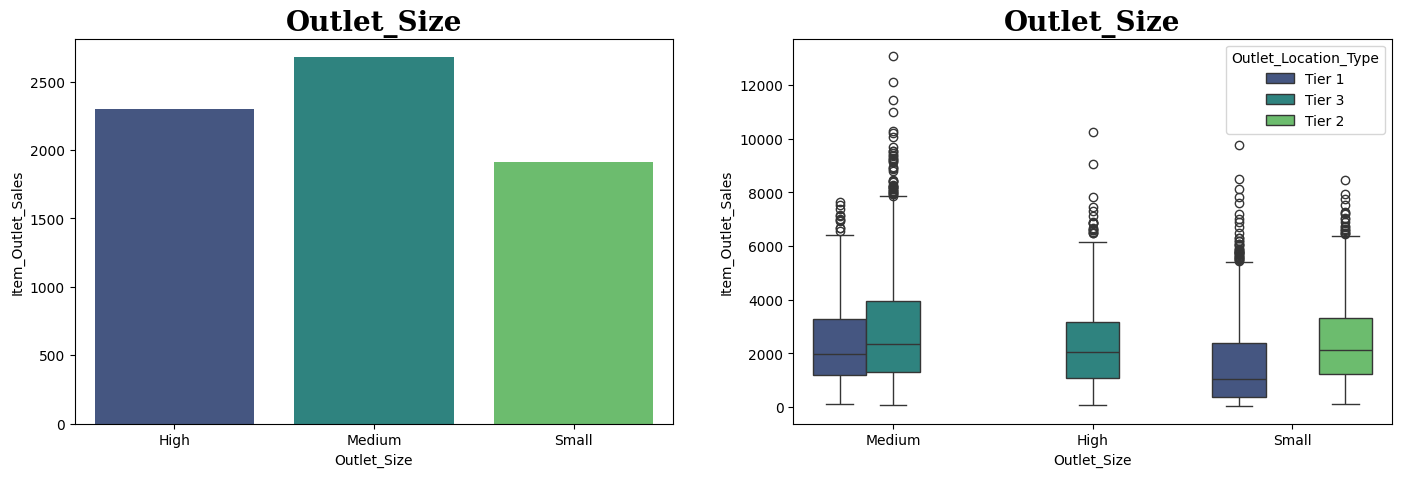

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (17, 5))

sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=size_sales,ax=ax[0],palette='viridis')
ax[0].set_title('Outlet_Size', fontweight = 'bold', fontfamily='serif', fontsize=20)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=df,ax=ax[1],palette='viridis')
ax[1].set_title('Outlet_Size', fontweight = 'bold', fontfamily='serif', fontsize=20)

Item Fat Content vs. Sales

In [20]:
fat_sales = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().reset_index()
fat_sales

,Item_Fat_Content,Item_Outlet_Sales
0,LF,2073.551928
1,Low Fat,2164.477336
2,Regular,2235.186702
3,low fat,2087.740737
4,reg,1962.192268


C:\Users\Sinta\AppData\Local\Temp\ipykernel_19964\675471674.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=fat_sales,palette='viridis')


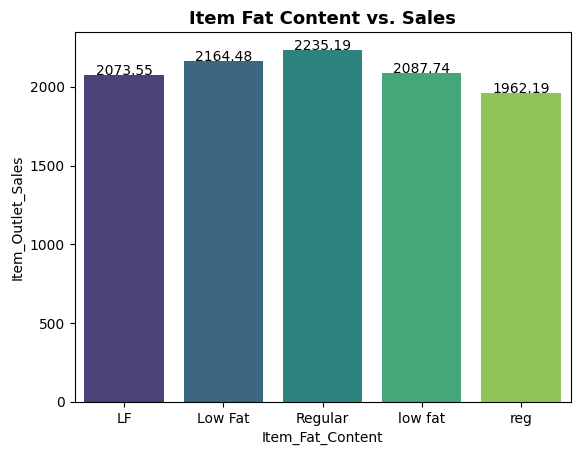

In [21]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=fat_sales,palette='viridis')
plt.title('Item Fat Content vs. Sales',fontsize=13,fontweight='bold')

for index, value in enumerate(fat_sales['Item_Outlet_Sales']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

Item Type vs Sales

In [22]:
item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()
item_type

,Item_Type,Item_Outlet_Sales
0,Starchy Foods,2374.332773
1,Seafood,2326.065928
2,Fruits and Vegetables,2289.009592
3,Snack Foods,2277.321739
4,Household,2258.784300
5,Dairy,2232.542597
6,Canned,2225.194904
7,Breads,2204.132226
8,Meat,2158.977911
9,Hard Drinks,2139.221622


C:\Users\Sinta\AppData\Local\Temp\ipykernel_19964\2665460518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=item_type,palette='viridis')


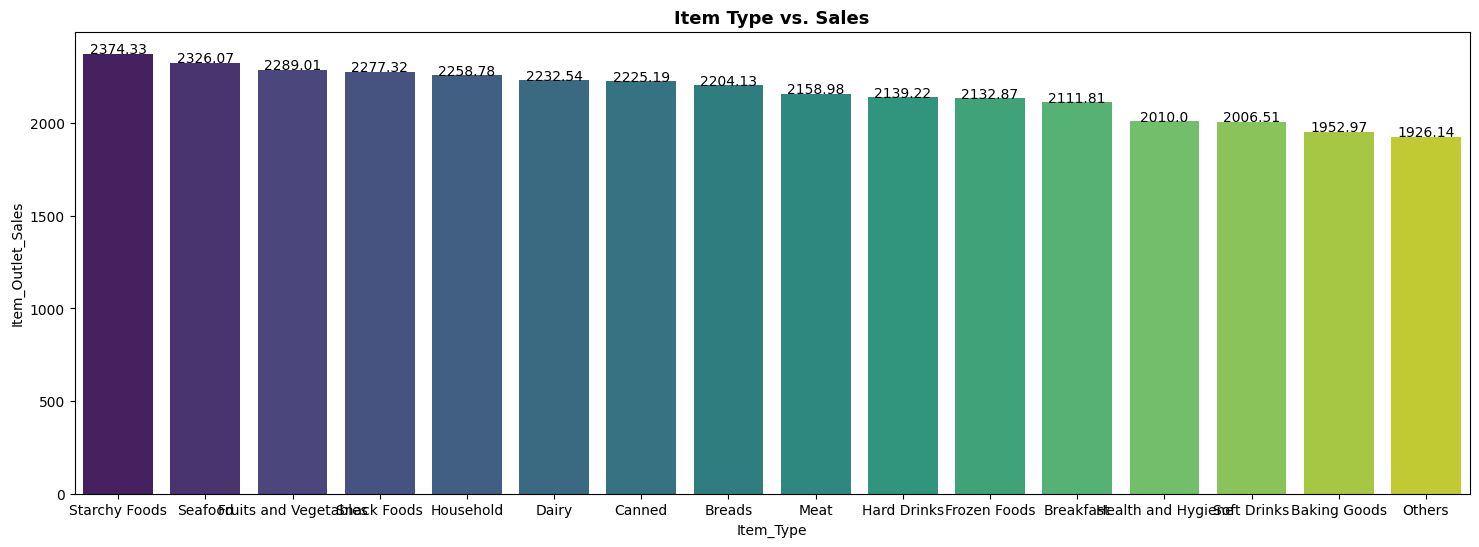

In [23]:
plt.figure(figsize=(18,6))

sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=item_type,palette='viridis')
plt.title('Item Type vs. Sales',fontsize=13,fontweight='bold')

for index, value in enumerate(item_type['Item_Outlet_Sales']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

plt.show()

Outlet Establishment Year vs. Sales

In [24]:
year_sales = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()
year_sales

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,2483.677474
1,2004,2438.841866
2,1999,2348.354635
3,2007,2340.675263
4,1987,2298.995256
5,1997,2277.844267
6,2002,2192.384798
7,2009,1995.498739
8,1998,339.351662


Text(0.5, 1.0, 'Outlet Establishment Year vs. Sales')

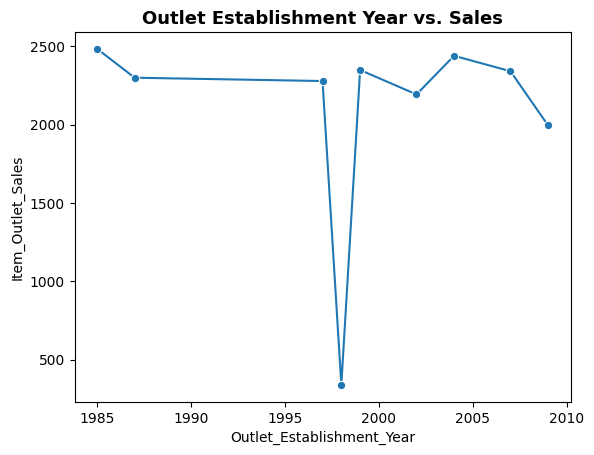

In [25]:
sns.lineplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=year_sales,marker='o')
plt.title('Outlet Establishment Year vs. Sales',fontsize=13,fontweight='bold')

Correlation

<Axes: >

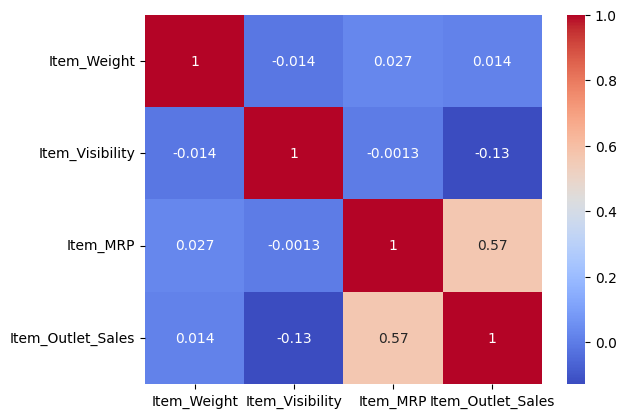

In [26]:
sns.heatmap(df[num_columns].corr(),cmap='coolwarm',annot=True)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [29]:
weight_dict = df.dropna(subset=['Item_Weight', 'Item_Identifier']).set_index('Item_Identifier')['Item_Weight'].to_dict()
filt = df['Item_Weight'].isna()
df.loc[filt, 'Item_Weight'] = df.loc[filt, 'Item_Identifier'].map(weight_dict)

In [30]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [31]:
# There are still 4 missing values, so I have chosen to drop them for cleaner analysis.
df=df[~df['Item_Weight'].isna()]

In [32]:
df['Outlet_Size'].value_counts(dropna=False)

Outlet_Size
Medium    2790
NaN       2410
Small     2387
High       932
Name: count, dtype: int64

In [33]:
df.loc[df['Outlet_Type'] == 'Grocery Store','Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [34]:
df.loc[(df['Outlet_Size'].isna()) & (df['Outlet_Type']=='Grocery Store'),'Outlet_Size'] = 'Small'

In [35]:
df['Outlet_Size'].value_counts(dropna=False)

Outlet_Size
Small     2942
Medium    2790
NaN       1855
High       932
Name: count, dtype: int64

In [36]:
df.loc[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2'),'Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [37]:
df.loc[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2'),'Outlet_Size'] = 'Small'

In [38]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [39]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [40]:
df['Item_Fat_Content'].replace({'low fat', 'LF'},'Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

C:\Users\Sinta\AppData\Local\Temp\ipykernel_19964\3848765117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace({'low fat', 'LF'},'Low Fat',inplace=True)


<Axes: >

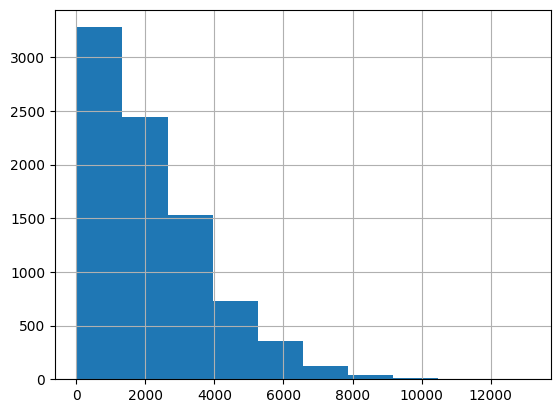

In [41]:
df['Item_Outlet_Sales'].hist()

<Axes: >

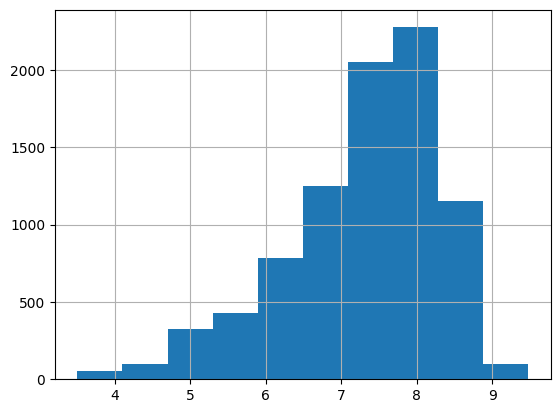

In [42]:
np.log(df['Item_Outlet_Sales']).hist()

In [43]:
df.to_csv('cleaned_data.csv')

In [44]:
df_clean = pd.read_csv('cleaned_data.csv')
df_clean

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8515,8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8516,8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8517,8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [45]:
num_columns = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

nominal_columns = ['Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']
ordinal_columns = ['Item_Fat_Content','Outlet_Size']

In [46]:
num_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler',StandardScaler())
    ])

ordinal_pipeline = Pipeline([
    ('ord_encoder',OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ('nom_encoder',OneHotEncoder(drop='first',sparse_output = False))
])

preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_columns),
    ('ordinal_pipeline',ordinal_pipeline,ordinal_columns),
    ('nominal_pipeline',nominal_pipeline,nominal_columns)
]).set_output(transform = 'pandas')

In [47]:
# One Split for Validation
X = df_clean.drop(['Item_Outlet_Sales','Item_Identifier'], axis = 1)
y = np.log(df_clean['Item_Outlet_Sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_Validtrain shape -- ', X_valid.shape)
print('y_Valid shape -- ', y_valid.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (5452, 11)
y_train shape --  (5452,)
X_Validtrain shape --  (1363, 11)
y_Valid shape --  (1363,)
X_test shape --  (1704, 11)
y_test shape --  (1704,)


In [48]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [63]:
X_test_processed.to_csv('test_preprocess.csv')

In [62]:
X_train_processed.to_csv('train_preprocess.csv')

In [64]:
X_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1704 entries, 7498 to 6041
Data columns (total 46 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   num_pipeline__1                                          1704 non-null   float64
 1   num_pipeline__Item_Weight                                1704 non-null   float64
 2   num_pipeline__Item_Visibility                            1704 non-null   float64
 3   num_pipeline__Item_MRP                                   1704 non-null   float64
 4   num_pipeline__Outlet_Establishment_Year                  1704 non-null   float64
 5   num_pipeline__Item_Weight^2                              1704 non-null   float64
 6   num_pipeline__Item_Weight Item_Visibility                1704 non-null   float64
 7   num_pipeline__Item_Weight Item_MRP                       1704 non-null   float64
 8   num_pipeline__Item_Weight Outl